# Société 

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random



Le premier paramètre que nous allons étudier est le le facteur socio-economique. Alors nous allons nous basé en premier lieu sur un système catégorisé : les riches et les pauvres. 
La classe moyenne a riche sera modélisée par des 1 et la classe pauvre par des 0.



In [23]:
def tableauBase(P):
    """les 0 sont les pauvres et 1 les riches."""
    tableau_de_zero_un = np.zeros((50,50), dtype='i') #np.zeros : renvoie un tableau 1D de 50 zero (lignes) et 50 zero (colonnes)
    for i in range(len(tableau_de_zero_un)): 
        for j in range(len(tableau_de_zero_un)):
            if random.random() < P :
                tableau_de_zero_un[i,j] = 1

    print(tableau_de_zero_un)
    
    return tableau_de_zero_un
    
tab_base = tableauBase(0.6)



[[1 1 1 ... 0 1 0]
 [0 1 0 ... 0 1 1]
 [1 1 0 ... 1 1 1]
 ...
 [0 1 1 ... 0 0 1]
 [1 1 0 ... 0 1 0]
 [1 1 0 ... 0 1 1]]


In [24]:
def verifpop(tabF):
    tab = tabF
    comptC = 0 #compteur consommateurs 
    comptNC = 0 #compteur non-consommateurs 
    for i in range(len(tab)) : #parcours de la matrice 
        for j in range(len(tab)) :#parcours de la matrice 
            if  i+1 <= len(tab) and i-1 >= 0 and  j+1 <= len(tab) and j-1 >= 0:
                if tab[i,j] == 1:
                    comptC = comptC +1
                if tab[i,j] == 0:
                    comptNC = comptNC +1
    return comptC + comptNC


print("Population  :",verifpop(tab_base))

Population  : 2401


Ensuite, une nouvelle matrice pour modéliser les consommateurs. La présence 4 '0' créé des consommateurs (-1).

In [25]:
def influence_se(tab):  
    """un carré de 0 crée un groupe de consommateurs (nommé -1)"""
    tableau = tab.copy()
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
            if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0:
                 if tableau[i,j] == 0 and tableau[i+1,j]==0  and tableau[i,j+1]==0 and tableau[i+1,j+1]==0 :
                    tableau[i,j] = -1
                    tableau[i+1,j]=-1 
                    tableau[i,j+1]=-1
                    tableau[i+1,j+1]=-1           
   
    return tableau

print(influence_se(tab_base))

[[ 1  1  1 ...  0  1  0]
 [ 0  1 -1 ...  0  1  1]
 [ 1  1 -1 ...  1  1  1]
 ...
 [ 0  1  1 ...  0  0  1]
 [ 1  1  0 ...  0  1  0]
 [ 1  1  0 ...  0  1  1]]


Le voisinnage : Lorsque un individu est entouré de -1, il voudra déménager. 

In [26]:
def voisins(tab, rowNumber, columnNumber):
    '''
    fonction pour récupérer les voisins
    '''
    N = []
    for i in range(rowNumber-1, rowNumber+2):
        for j in range(columnNumber-1, columnNumber+2):
            if  (i >= 0 and i < tab.shape[0]) and (j >= 0 and j < tab.shape[1]) and ((i,j)!=(rowNumber,columnNumber)):
                N.append(tab[i,j])
    return N


In [27]:
def moyenne_voisins(tab,i,j):
    '''
    Calcul de la moyenne des valeurs voisinnes
    '''
    N = voisins(tab,i,j)
    return sum(N)/len(N)
    
moyenne_voisins(tab_base,2,3)


0.375

In [28]:
def Listedemenagement(tableau):
    """demande de demenagement apres parcours de la matrice"""
    #demande : list[int]
    demande = []
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
                if (tableau[i,j] == 1 and  moyenne_voisins(tableau,i,j) < 0.5) or (tableau[i,j] == 0 and  moyenne_voisins(tableau,i,j) > 0.5) :
                    demande.append(tableau[i,j])
                                            
    return demande


In [29]:
def demandeDem(tab):
    """représentation de la demande de demenagement """
    tableau = tab.copy()
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
             if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0 :
                    if (tableau[i,j] == 1 and  moyenne_voisins(tableau,i,j) < 0.5) or (tableau[i,j] == 0 and  moyenne_voisins(tableau,i,j) > 0.5 ) :
                        tableau[i,j] = 2 #case 1 ou 0 devient 2 
    
    return tableau

In [30]:
def demenagement(tableau,tab_bases,L):
    """deplacement de personne"""
    
    #ind : int
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
            
             if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0:
                    
                    if tableau[i,j] == 2  and moyenne_voisins(tab_base,i,j) > 0.5 :
                        for demandeur in range (0,len(L)-1):
                             if L[demandeur] == 1:
                                tableau[i,j] = L[demandeur]
                                L[demandeur] = -2
                                break
                        if tableau[i,j] == 2:
                            tableau[i,j] = tab_bases[i,j]
                                
                    if tableau[i,j] == 2  and moyenne_voisins(tab_base,i,j) <= 0.5 :
                        for demandeur in range (0,len(L)-1):
                            if L[demandeur] == 0 :
                                tableau[i,j] = L[demandeur]
                                L[demandeur] = -2
                                break
                                
                        if tableau[i,j] == 2:
                            tableau[i,j] = tab_bases[i,j]
    print("\n\n\t NOUVEAU  'QUARTIER' \n\n\n")
    print(tableau)
    return tableau

In [31]:
def nvpop(tableau,tab_base,L):#creation de la nouvelle population 
    """liste des demande non traiter"""
    #ind : int
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
            if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0:
                if moyenne_voisins(tab_base,i,j) > 0.5 :
                    for demandeur in range (0,len(L)-1):
                        if L[demandeur] == 1:
                            L[demandeur] = -2
                            break
                                
                if moyenne_voisins(tab_base,i,j) <= 0.5 :
                    for demandeur in range (0,len(L)-1):
                        if L[demandeur] == 0 :
                            L[demandeur] = -2
                            break
    return L




	 NOUVEAU  'QUARTIER' 



[[1 1 1 ... 0 1 0]
 [0 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 1 1 ... 0 0 1]
 [1 1 0 ... 0 1 0]
 [1 1 0 ... 0 1 1]]
nombre de demenagement : 871


	 NOUVEAU  'QUARTIER' 



[[1 1 1 ... 0 1 0]
 [0 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 1 1 ... 0 0 1]
 [1 1 0 ... 0 1 0]
 [1 1 0 ... 0 1 1]]
nombre de demenagement : 599


	 NOUVEAU  'QUARTIER' 



[[1 1 1 ... 0 1 0]
 [0 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 1 1 ... 0 0 1]
 [1 1 0 ... 0 1 0]
 [1 1 0 ... 0 1 1]]
nombre de demenagement : 450


	 NOUVEAU  'QUARTIER' 



[[1 1 1 ... 0 1 0]
 [0 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 1 1 ... 0 0 1]
 [1 1 1 ... 0 1 0]
 [1 1 0 ... 0 1 1]]
nombre de demenagement : 356

rajout de la creation des consommateurs



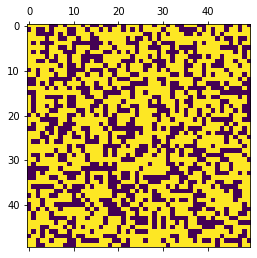

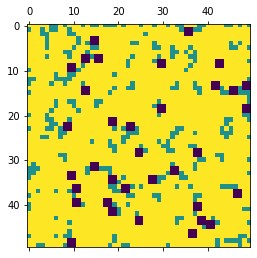

nb pers : 2401


In [37]:
def n_generations(tab_base,n):
    """ transformation de la ville """
    
    ancienneV = tab_base
    plt.matshow(ancienneV)
    
    for nb in range(0,n-1):
        
        DMdemenagement = demandeDem(ancienneV)
        Ldmng = Listedemenagement(ancienneV)
        nouvelleV=demenagement(DMdemenagement,ancienneV,Ldmng)
        ancienneV=nouvelleV
        
        print("nombre de demenagement :",len(Ldmng))
        
        
    print("\nrajout de la creation des consommateurs\n")
    plt.matshow(influence_se(nouvelleV))#de la nouvelle population
    plt.show()
    
    print("nb pers :",verifpop(nouvelleV))
    return 0 

tabF=n_generations(tab_base,5)

# INFLUENCE FAMILIALE 

Pour cette seconde partie, nous allons modéliser les conséquences que peut avoir l'influence familiale. 


- modélisation d'une famille (max 5pers)
- si 1 personne est consommatrices (0), X% chance qu'une autre le devienne
- ...